In [1]:
#!pip install split-folders

In [2]:
import split_folders

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [4]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## accuracy(train_acc: 98.42 and test_acc:85.71  for 15 epochs)



In [5]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))


model.add(Dense( activation = 'sigmoid', units=1)) 

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(
        r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/Dataset/Tumor_data_Split/train',
        target_size=(64, 64),
        class_mode='binary')

Found 851 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory(
        r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/Dataset/Tumor_data_Split/test',
        target_size=(64, 64),
        class_mode='binary')

Found 203 images belonging to 2 classes.


In [10]:
model.fit_generator(
        train_set,
        epochs=15,
        validation_data=test_set)

Epoch 1/15
27/27 [==============================] - 10s 381ms/step - loss: 0.6826 - acc: 0.5967 - val_loss: 0.6866 - val_acc: 0.6059
Epoch 2/15
27/27 [==============================] - 8s 300ms/step - loss: 0.6823 - acc: 0.6009 - val_loss: 0.6790 - val_acc: 0.6059
Epoch 3/15
27/27 [==============================] - 8s 307ms/step - loss: 0.6755 - acc: 0.6009 - val_loss: 0.6683 - val_acc: 0.6059
Epoch 4/15
27/27 [==============================] - 8s 305ms/step - loss: 0.6654 - acc: 0.6002 - val_loss: 0.6747 - val_acc: 0.6059
Epoch 5/15
27/27 [==============================] - 8s 300ms/step - loss: 0.6667 - acc: 0.6024 - val_loss: 0.6554 - val_acc: 0.6059
Epoch 6/15
27/27 [==============================] - 8s 300ms/step - loss: 0.6370 - acc: 0.6353 - val_loss: 0.6266 - val_acc: 0.6453
Epoch 7/15
27/27 [==============================] - 8s 300ms/step - loss: 0.5625 - acc: 0.7186 - val_loss: 0.5504 - val_acc: 0.7291
Epoch 8/15
27/27 [==============================] - 8s 304ms/step - loss: 0

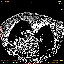

In [23]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img(r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/Dataset/Tumor_data_Split/inference/Tumor3.jpg'
                           ,target_size =(64,64))

test_image

In [24]:
## Convert image to array
test_image = image.img_to_array(test_image)

test_image=test_image.reshape(1,64, 64, 3)

In [25]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

result

array([[1.]], dtype=float32)

In [26]:
label_map = (train_set.class_indices)
print(label_map)

{'No Tumor': 0, 'Tumor': 1}


In [27]:
## Class label 

if result == 0:
    prediction = 'No Tumor'
else:
    prediction = 'Tumor'

In [28]:
prediction

'Tumor'

# Saving Weigths

tumor_model_json = model.to_json()
with open("tumor_model.json","w") as json_file:
    json_file.write(tumor_model_json)
#serialize weights to
model.save_weights("tumor_model.h5")
print("Saved model to disk")